# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Data Interpretation
- A Portugese Bank did a telephone marketing campaign to attract customers to set up a long-term deposit account with good interest rate
- A total of 17 campaigns occurred between May 2008 and Nov 2010

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import set_config
set_config(display="diagram")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Data Analysis
1. Check for Missing values and delete\replace the missing values depending on what seems to fit the situation
   - There are no missing values in this dataset
3. Perform Univariate and Bivariate Analysis of the existing features
4. Check for data imbalance
5. Understand datatype of each feature. Convert Categorical data to numerical data
6. Check the unique values in all categorical features. Value 'unknown' found in many categorical features. Exclude them from analysis. More than 30000 rows still available for analysis even after removing the rows with value 'unknown'
7. Categorical Feature poutcome has more than 35000 rows with value 'non existent'. It does not add much value to the analysis. Remove it from analysis
### Categorical Data Clean up
- After removing all rows with unknown values there are still 30488 rows for analysis
- The following features default, housing, loan and y have binary data no and yes. Using mapping to convert them to 0 and 1 respectively.
- For feature 'contact' there are two values, telephone and cellular. Check how many are from telephone compared to cellular. One third of the data is contacted via telephone. Include both in analysis


### Check for Missing values
- There are no missing values in this dataset

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Check the datatype of the features 
1. Check the unique values in all categorical features. Value 'unknown' found in many categorical features. Exclude them from analysis. More than 30000 rows still available for analysis even after removing the rows with value 'unknown'
2. Categorical Feature poutcome has more than 35000 rows with value 'non existent'. It does not add much value to the analysis. Remove it from analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['category','object']).columns
num_columns_df = df.shape[1]
datatype_columns = len(numerical_columns) + len(categorical_columns)

print('Numerical Columns:', numerical_columns)
print('Categorical Columns:', categorical_columns)
print('Number of Columns in Data Frame of datatype numerical and categorical:', datatype_columns)
print('Number of Columns in the Data Frame:', num_columns_df)

Numerical Columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Number of Columns in Data Frame of datatype numerical and categorical: 21
Number of Columns in the Data Frame: 21


In [7]:
#Find the unique values in categorical features dataset
for col in categorical_columns:
    print('Feature Name:', col)
    print('Values:', df[col].unique())

Feature Name: job
Values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Feature Name: marital
Values: ['married' 'single' 'divorced' 'unknown']
Feature Name: education
Values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Feature Name: default
Values: ['no' 'unknown' 'yes']
Feature Name: housing
Values: ['no' 'yes' 'unknown']
Feature Name: loan
Values: ['no' 'yes' 'unknown']
Feature Name: contact
Values: ['telephone' 'cellular']
Feature Name: month
Values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Feature Name: day_of_week
Values: ['mon' 'tue' 'wed' 'thu' 'fri']
Feature Name: poutcome
Values: ['nonexistent' 'failure' 'success']
Feature Name: y
Values: ['no' 'yes']


In [8]:
#Find missing data with value "unknown" in the features 
for col in df.columns:
    print(f'Count of unknown outputs for feature {col}: {df[col].eq('unknown').sum()}')

Count of unknown outputs for feature age: 0
Count of unknown outputs for feature job: 330
Count of unknown outputs for feature marital: 80
Count of unknown outputs for feature education: 1731
Count of unknown outputs for feature default: 8597
Count of unknown outputs for feature housing: 990
Count of unknown outputs for feature loan: 990
Count of unknown outputs for feature contact: 0
Count of unknown outputs for feature month: 0
Count of unknown outputs for feature day_of_week: 0
Count of unknown outputs for feature duration: 0
Count of unknown outputs for feature campaign: 0
Count of unknown outputs for feature pdays: 0
Count of unknown outputs for feature previous: 0
Count of unknown outputs for feature poutcome: 0
Count of unknown outputs for feature emp.var.rate: 0
Count of unknown outputs for feature cons.price.idx: 0
Count of unknown outputs for feature cons.conf.idx: 0
Count of unknown outputs for feature euribor3m: 0
Count of unknown outputs for feature nr.employed: 0
Count of

### Remove the rows with value "unknown" in categorical dataset
1. Check the unique values in all categorical features. Value 'unknown' found in many categorical features. Exclude them from analysis. More than 30000 rows still available for analysis even after removing the rows with value 'unknown'
2. Categorical Feature poutcome has more than 35000 rows with value 'non existent'. It does not add much value to the analysis. Remove it from analysis

In [9]:
#Remove the rows with value "unknown" in categorical dataset

#Create a copy of the dataframe with cleaned dataset
df_clean = df.copy()

#Exclude all rows in all categorical feature with value 'unknown'
for col in categorical_columns:
    df_clean = df_clean[df_clean[col] != 'unknown']

In [10]:
#Check if there are any categorical features with value 'unknown'

#Find missing data with value "unknown" in the features 
for col in df_clean.columns:
    print(f'Count of unknown outputs for feature {col}: {df_clean[col].eq('unknown').sum()}')

print('Rows in Filtered Dataframe:', df_clean.shape[0])

Count of unknown outputs for feature age: 0
Count of unknown outputs for feature job: 0
Count of unknown outputs for feature marital: 0
Count of unknown outputs for feature education: 0
Count of unknown outputs for feature default: 0
Count of unknown outputs for feature housing: 0
Count of unknown outputs for feature loan: 0
Count of unknown outputs for feature contact: 0
Count of unknown outputs for feature month: 0
Count of unknown outputs for feature day_of_week: 0
Count of unknown outputs for feature duration: 0
Count of unknown outputs for feature campaign: 0
Count of unknown outputs for feature pdays: 0
Count of unknown outputs for feature previous: 0
Count of unknown outputs for feature poutcome: 0
Count of unknown outputs for feature emp.var.rate: 0
Count of unknown outputs for feature cons.price.idx: 0
Count of unknown outputs for feature cons.conf.idx: 0
Count of unknown outputs for feature euribor3m: 0
Count of unknown outputs for feature nr.employed: 0
Count of unknown outp

### Feature Name: poutcome
- Values: ['nonexistent' 'failure' 'success']
- Check how many values are 'nonexistent'
- There are 35563 rows in poutcome with value 'nonexistent'
- Exclude this feature from data analysis

In [11]:
df['poutcome'].eq('nonexistent').sum()

35563

In [12]:
### Drop column poutcome from analysis
df_clean = df_clean.drop('poutcome',axis =1)
df_clean = df_clean.drop('duration',axis =1)
df_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes


### Categorical Data Clean up
- After removing all rows with unknown values there are still 30488 rows for analysis
- The following features default, housing, loan and y have binary data no and yes. Using mapping to convert them to 0 and 1 respectively.
- For feature 'contact' there are two values, telephone and cellular. Check how many are from telephone compared to cellular. One third of the data is contacted via telephone. Include both in analysis


In [13]:
for col in df_clean.select_dtypes('object'):
    print(f'Clean Dataset Feature Name {col} unique values: {df_clean[col].unique()}')

Clean Dataset Feature Name job unique values: ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
Clean Dataset Feature Name marital unique values: ['married' 'single' 'divorced']
Clean Dataset Feature Name education unique values: ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']
Clean Dataset Feature Name default unique values: ['no' 'yes']
Clean Dataset Feature Name housing unique values: ['no' 'yes']
Clean Dataset Feature Name loan unique values: ['no' 'yes']
Clean Dataset Feature Name contact unique values: ['telephone' 'cellular']
Clean Dataset Feature Name month unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Clean Dataset Feature Name day_of_week unique values: ['mon' 'tue' 'wed' 'thu' 'fri']
Clean Dataset Feature Name y unique values: ['no' 'yes']


In [14]:
# The following features default, housing, loan and y have binary data no and yes. Using mapping to convert them to 0 and 1 respectively.
df_clean['housing'] = df_clean['housing'].map({'yes':1,'no':0})
df_clean['loan'] = df_clean['loan'].map({'yes':1,'no':0})
df_clean['default'] = df_clean['default'].map({'yes':1,'no':0})
df_clean['y'] = df_clean['y'].map({'yes':1,'no':0})
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  int64  
 5   housing         30488 non-null  int64  
 6   loan            30488 non-null  int64  
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  campaign        30488 non-null  int64  
 11  pdays           30488 non-null  int64  
 12  previous        30488 non-null  int64  
 13  emp.var.rate    30488 non-null  float64
 14  cons.price.idx  30488 non-null  float64
 15  cons.conf.idx   30488 non-null  float64
 16  euribor3m       30488 non-null  float64
 17  nr.employed     30488 non-null  floa

In [15]:
#For feature 'contact' there are two values, telephone and cellular. Check how many are from telephone compared to cellular.
print('Contact using telephone', df_clean['contact'].eq('telephone').sum())
print('Contact using cellular', df_clean['contact'].eq('cellular').sum())

Contact using telephone 10045
Contact using cellular 20443


### Data Imbalance Analysis
- Data below shows that from the output data most of the customers did not choose to open the account
- The data is imbalanced with 88.74% of the clients saying No 

Distribution of Clients Term Deposit Subscription
y
no     36548
yes     4640
Name: count, dtype: int64
Percentage of Clients who did not Subscribe to the Term Deposit Account


88.73458288821988

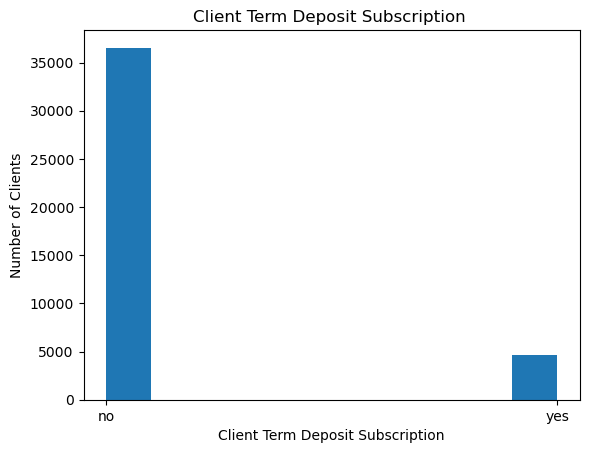

In [16]:
#Plot Histogram of the clients who prescribed deposit
plt.hist(df['y'])
plt.title('Client Term Deposit Subscription ')
plt.xlabel('Client Term Deposit Subscription')
plt.ylabel('Number of Clients')

print('Distribution of Clients Term Deposit Subscription')
print(df['y'].value_counts())

print('Percentage of Clients who did not Subscribe to the Term Deposit Account')
(df['y'] == 'no').sum()/df['y'].value_counts().sum() * 100

### Categorical Data Analysis
- Univariate Analysis shows that for all categorical features there is both outputs (yes and no) available. All features will be included in the analysis 

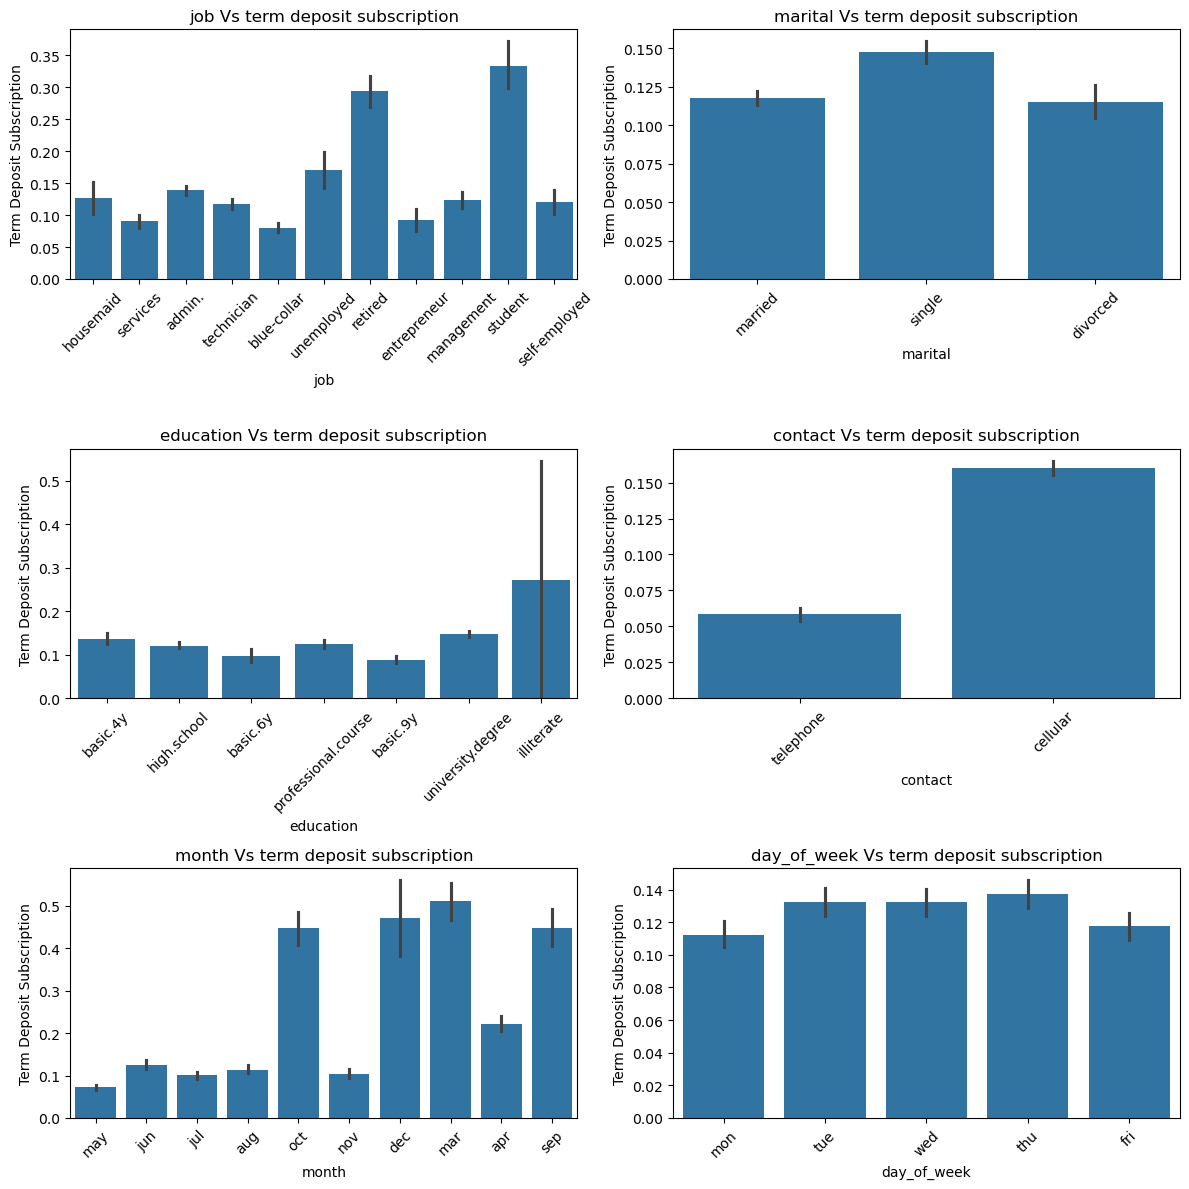

In [17]:
#Determine the number of sub plots needed
num_plots = len(df_clean.select_dtypes('object').columns)
rows = math.ceil(num_plots/2)

fig,axs = plt.subplots(rows,2,figsize=(12,rows*4))
plt.xticks(rotation=45)
ax = axs.flatten()

for i, col in enumerate(df_clean.select_dtypes('object').columns):
    sns.barplot(x=df_clean[col], y=df_clean['y'], ax=ax[i])    
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Term Deposit Subscription')
    ax[i].set_title(f'{col} Vs term deposit subscription')
    ax[i].tick_params(axis='x',rotation = 45)

plt.tight_layout()
plt.show()



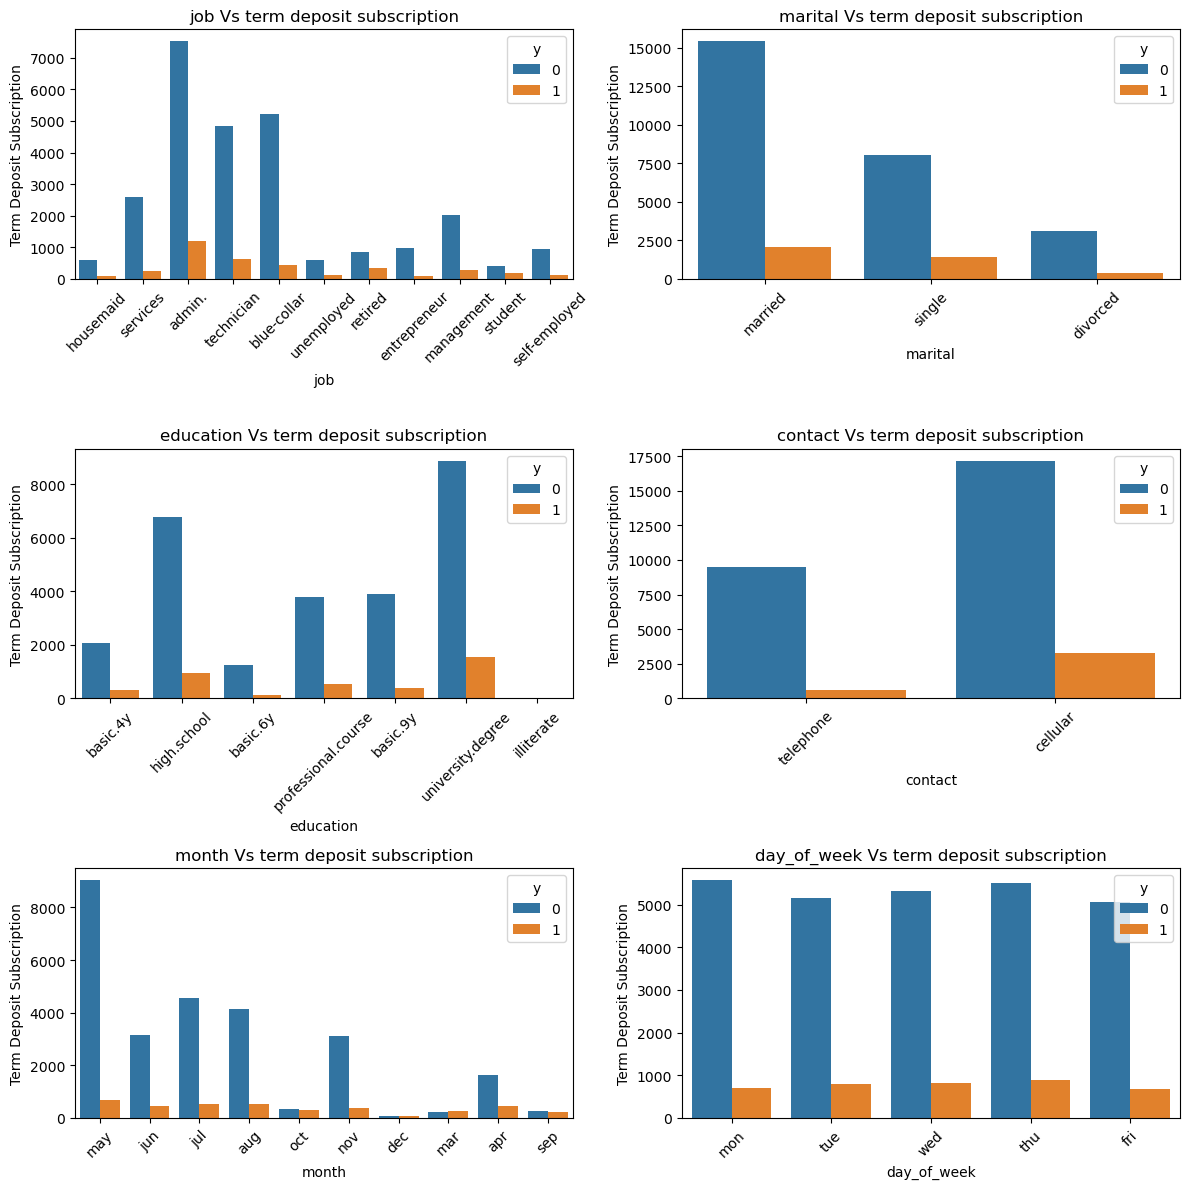

In [18]:
#Determine the number of sub plots needed
num_plots = len(df_clean.select_dtypes('object').columns)
rows = math.ceil(num_plots/2)

fig,axs = plt.subplots(rows,2,figsize=(12,rows*4))
plt.xticks(rotation=45)
ax = axs.flatten()

for i, col in enumerate(df_clean.select_dtypes('object').columns):
    sns.countplot(x=df_clean[col], hue=df_clean['y'], ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Term Deposit Subscription')
    ax[i].set_title(f'{col} Vs term deposit subscription')
    ax[i].tick_params(axis='x',rotation = 45)

plt.tight_layout()
plt.show()

### Numerical Data Univariate Analysis
- Univariate Analysis shows that for all Numerical features there is both outputs (yes and no) available. All features will be included in the analysis 

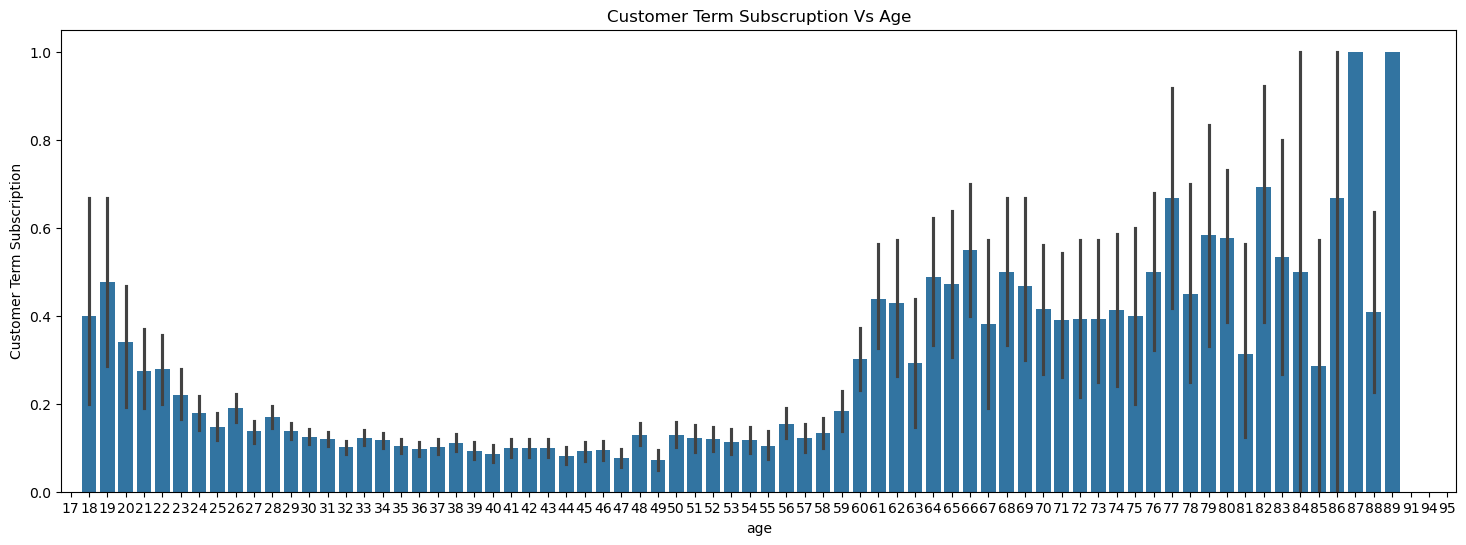

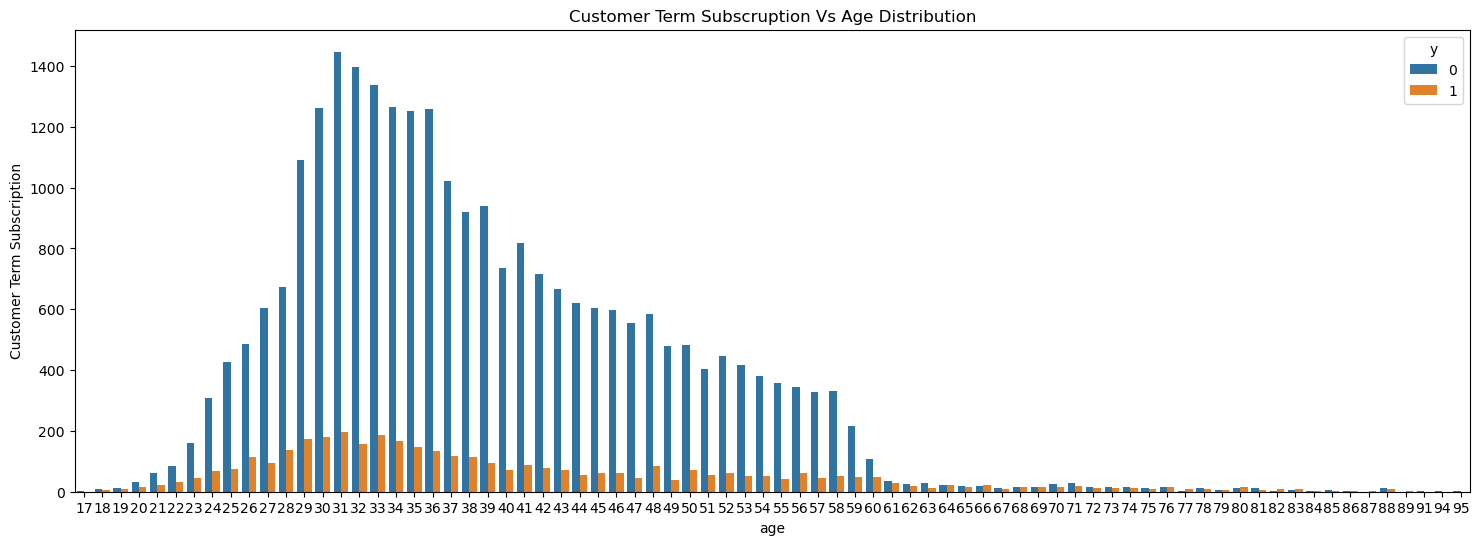

In [19]:
#Age category dependency on the customer term subscription

plt.figure(figsize = (18,6))
sns.barplot(x=df_clean['age'],y=df_clean['y'])
plt.ylabel('Customer Term Subscription')
plt.title('Customer Term Subscruption Vs Age')
plt.show()
plt.figure(figsize = (18,6))
sns.countplot(x=df_clean['age'],hue=df_clean['y'])
plt.ylabel('Customer Term Subscription')
plt.title('Customer Term Subscruption Vs Age Distribution')
plt.show()

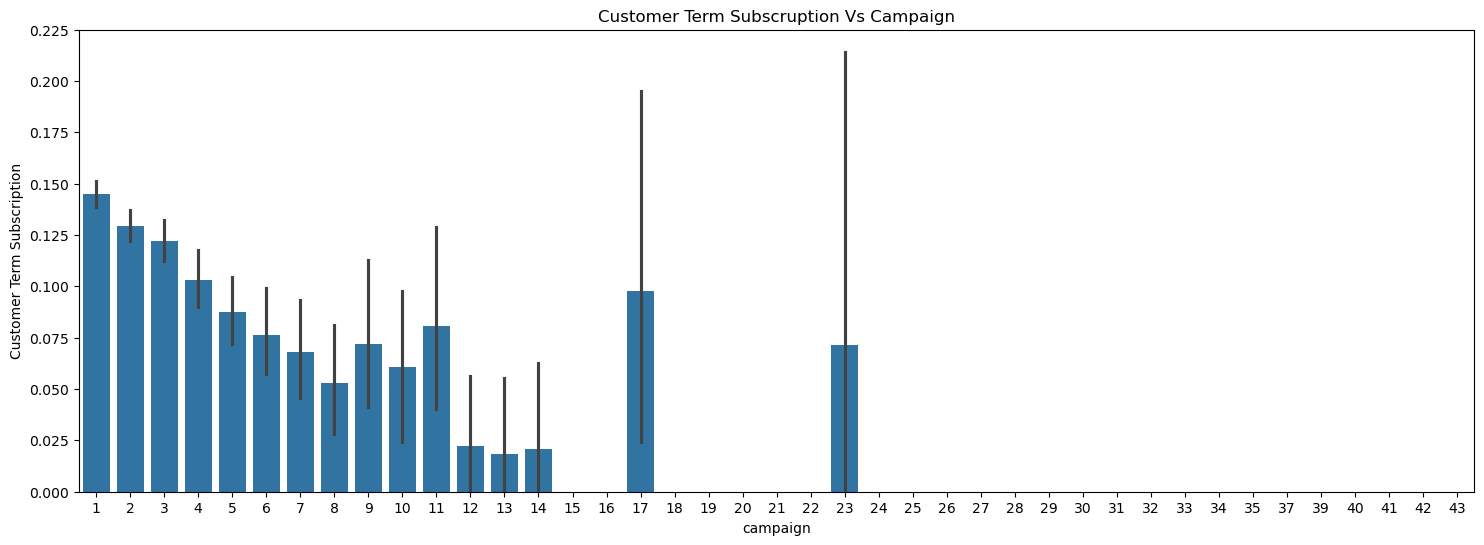

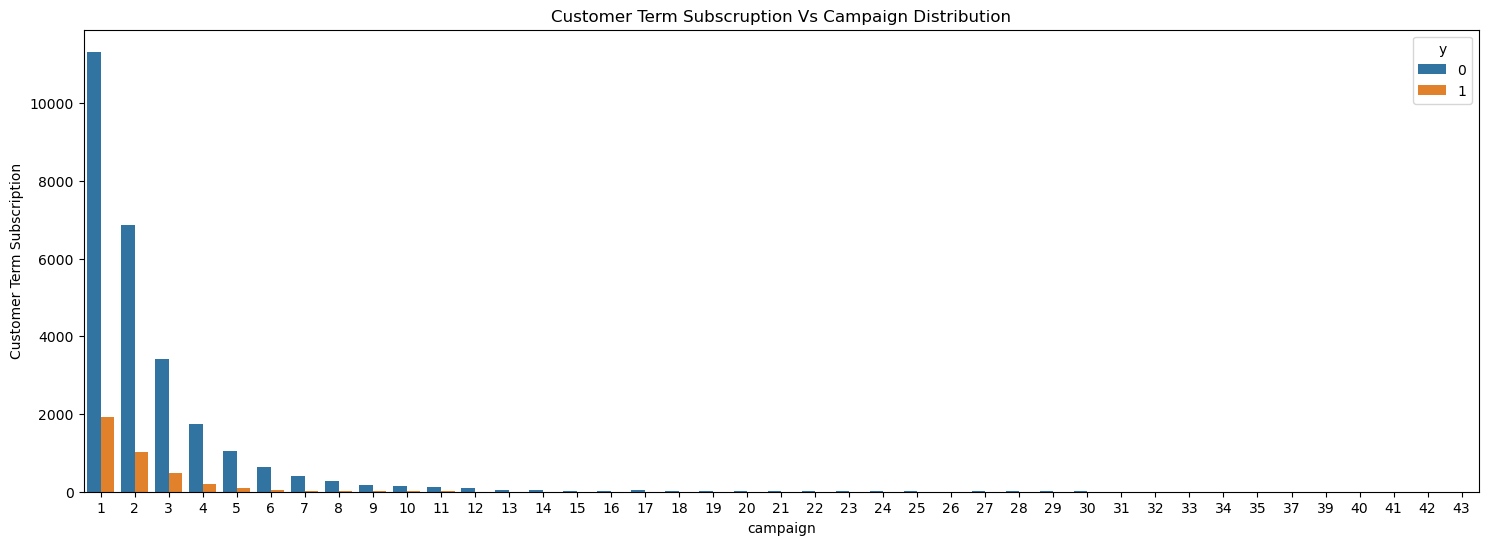

In [20]:
#Campagin category dependency on the customer term subscription

plt.figure(figsize = (18,6))
sns.barplot(x=df_clean['campaign'],y=df_clean['y'])
plt.ylabel('Customer Term Subscription')
plt.title('Customer Term Subscruption Vs Campaign')
plt.show()
plt.figure(figsize = (18,6))
sns.countplot(x=df_clean['campaign'],hue=df_clean['y'])
plt.ylabel('Customer Term Subscription')
plt.title('Customer Term Subscruption Vs Campaign Distribution')
plt.show()

In [21]:
df_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0,0,0,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


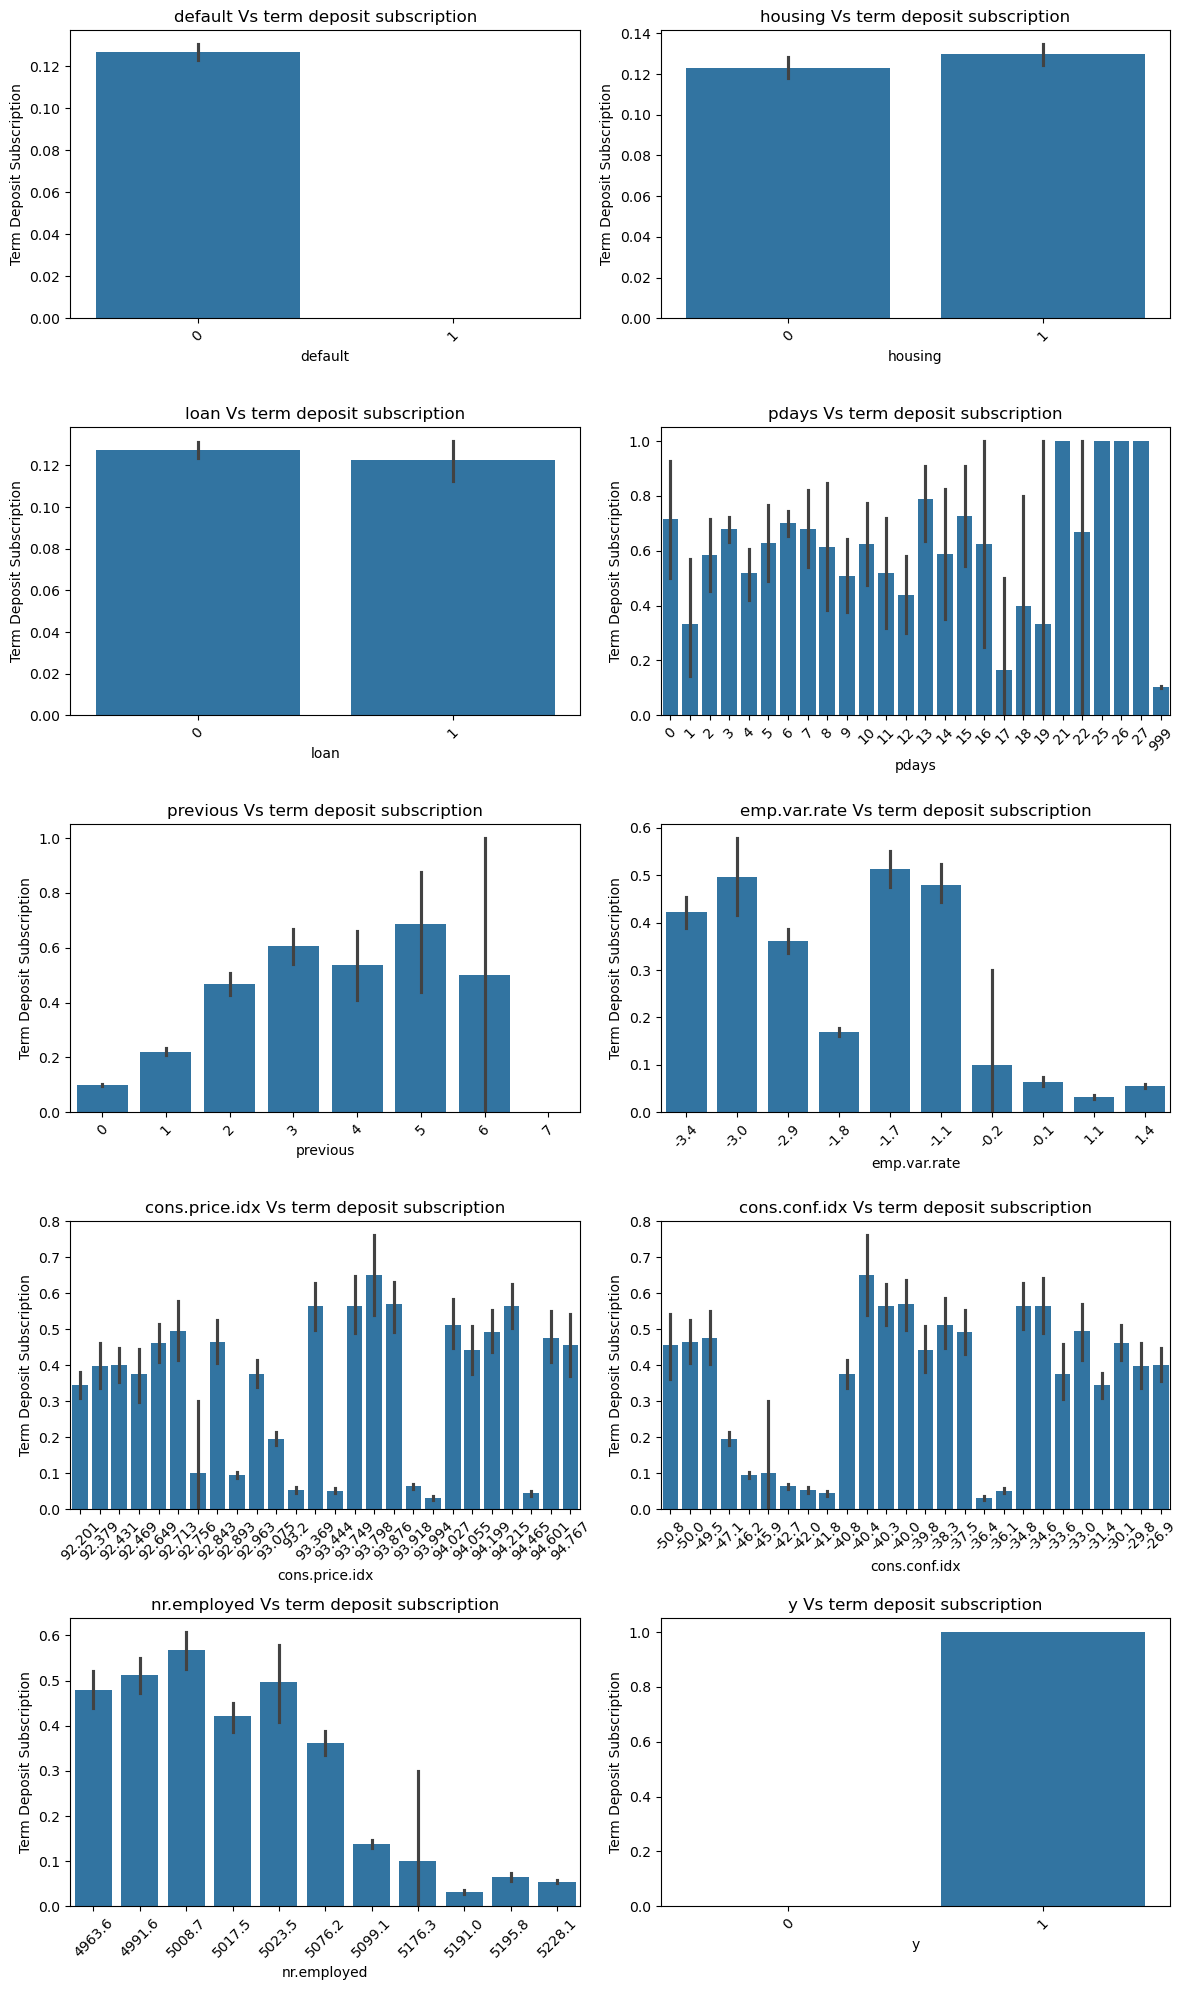

In [22]:
#Determine the number of sub plots needed

cols_to_remove = ['age','duration','campaign','euribor3m']
num_plots1 = df_clean.select_dtypes('number').columns.tolist()
for col in cols_to_remove:
    if col in num_plots1:
        num_plots1.remove(col)
num_plots = len(num_plots1)
rows = math.ceil(num_plots/2)

fig,axs = plt.subplots(rows,2,figsize=(12,rows*4))
plt.xticks(rotation=45)
ax = axs.flatten()



for i, col in enumerate(num_plots1):
    sns.barplot(x=df_clean[col], y=df_clean['y'], ax=ax[i])    
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Term Deposit Subscription')
    ax[i].set_title(f'{col} Vs term deposit subscription')
    ax[i].tick_params(axis='x',rotation = 45)

plt.tight_layout()
plt.show()



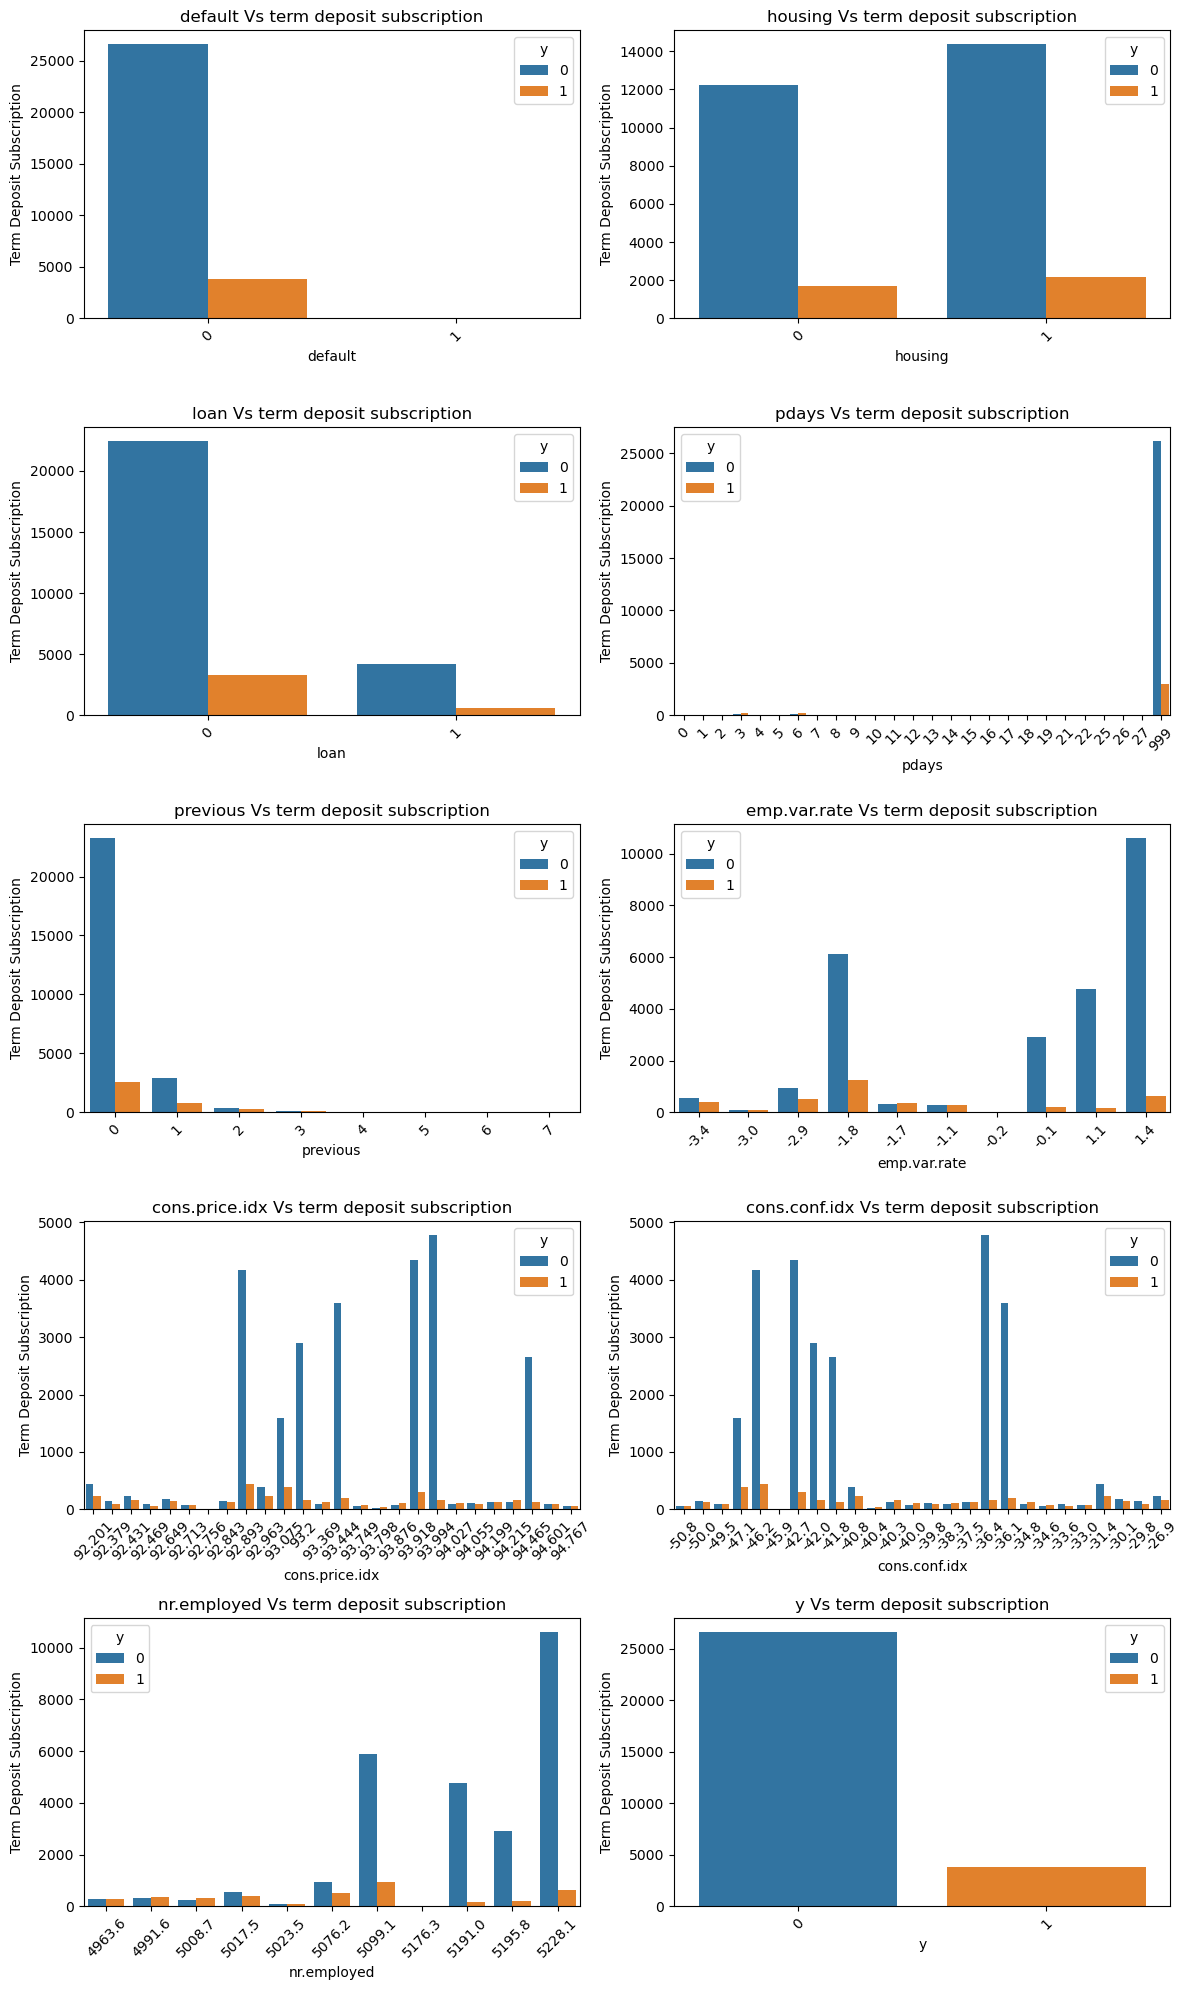

In [23]:
#Determine the number of sub plots needed
cols_to_remove = ['age','duration','campaign','euribor3m']
num_plots1 = df_clean.select_dtypes('number').columns.tolist()
for col in cols_to_remove:
    if col in num_plots1:
        num_plots1.remove(col)
num_plots = len(num_plots1)
rows = math.ceil(num_plots/2)

fig,axs = plt.subplots(rows,2,figsize=(12,rows*4))
plt.xticks(rotation=45)
ax = axs.flatten()

for i, col in enumerate(num_plots1):
    sns.countplot(x=df_clean[col], hue=df_clean['y'], ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Term Deposit Subscription')
    ax[i].set_title(f'{col} Vs term deposit subscription')
    ax[i].tick_params(axis='x',rotation = 45)

plt.tight_layout()
plt.show()

### Numerical Data Analysis

In [24]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'duration'),
  Text(3, 0, 'campaign'),
  Text(4, 0, 'pdays'),
  Text(5, 0, 'previous'),
  Text(6, 0, 'emp.var.rate'),
  Text(7, 0, 'cons.price.idx'),
  Text(8, 0, 'cons.conf.idx'),
  Text(9, 0, 'euribor3m'),
  Text(10, 0, 'nr.employed')])

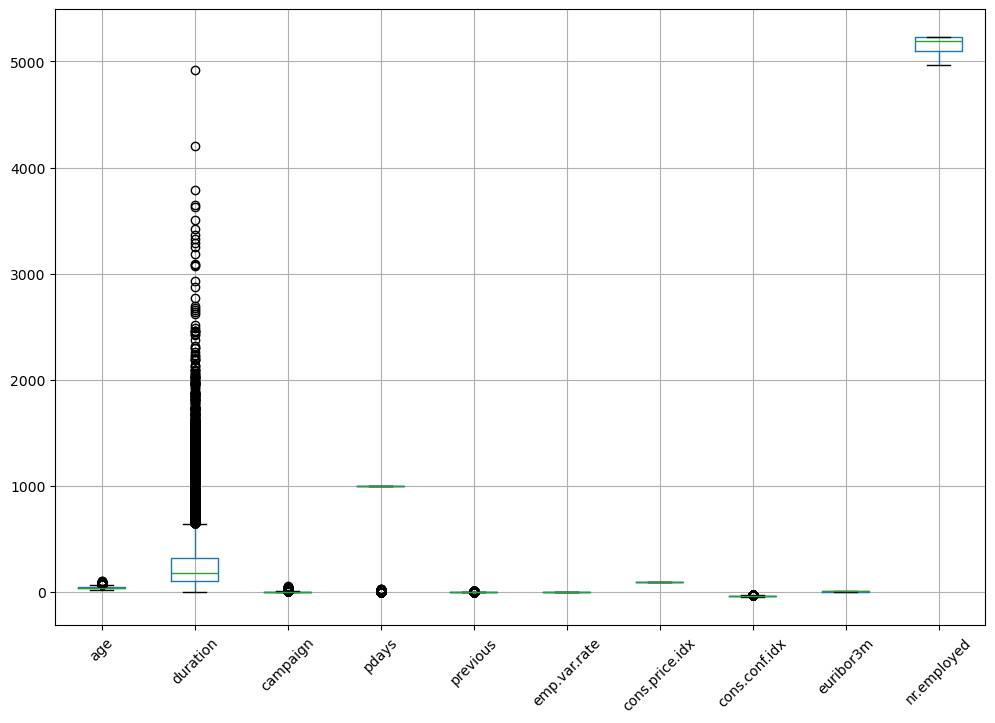

In [25]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.xticks(rotation=45)

### Numerical Data Correlation

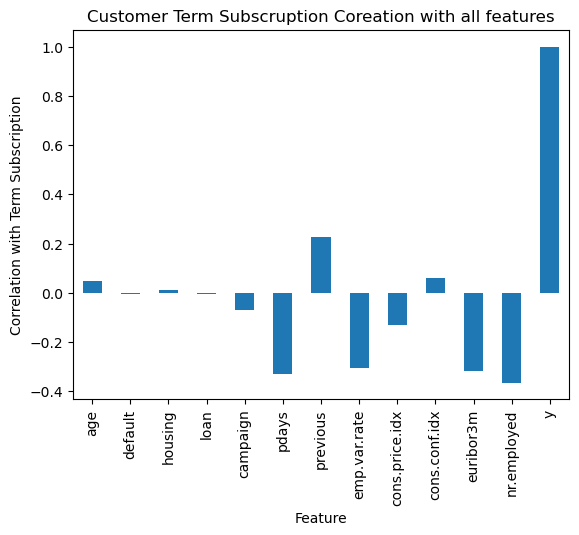

In [26]:
#Generate a new dataframe with only numerical data types
numerical_df = df_clean.select_dtypes(include='number')

#Compute the correlation matrix
corr_matrix = numerical_df.corr()

corr_matrix_y = corr_matrix['y']
corr_matrix_y.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation with Term Subscription')
plt.title('Customer Term Subscruption Coreation with all features')
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business goal is to find a model that can explain success of a contact during the marketing campaign, that is if the client subscribes the deposit. Identiy what factors used in the marketing can have an effective impact on getting the client to subscribe. The model can improve campaign effciency by identifying the main characteristics that affect success, helping in better management of the available resources (e.g. human effort, phone calls, time etc.) and selection of a high quality and affordable set of potential buying customers.A

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [27]:
# Define features (X) and target (y)
X = df_clean.drop('y', axis=1)
y = df_clean['y']

# Encode the target variable (already implemented)
#le = LabelEncoder()
#y = le.fit_transform(y)


# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])



### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data using the preprocessor 
X_train_transformed = preprocessor.fit_transform(X_train) 
X_test_transformed = preprocessor.transform(X_test) 

# Get feature names from the OneHotEncoder 
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns) 

# Combine numerical and encoded feature names 
all_feature_names = numerical_columns + encoded_feature_names.tolist() 

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [30]:
### Define dummy classifier
dummy_clf = DummyClassifier().fit(X_train_transformed, y_train)
baseline_score = dummy_clf.score(X_test_transformed, y_test)
baseline_accuracy = accuracy_score(dummy_clf.predict(X_test), y_test)

print(baseline_score)
print(baseline_accuracy)
#score method and accuracy_score return the same value

0.8697933748770088
0.8697933748770088


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [31]:

# Define the models and hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    #'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]}),
    'ridgeclassifier': (RidgeClassifier(), {'ridgeclassifier__alpha': [1, 10]}),
    'lasso': (Lasso(max_iter=1000), {'lasso__alpha': [1, 10]})
}

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    
    # Get feature names from the OneHotEncoder 
    encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns) 

    # Combine numerical and encoded feature names 
    all_feature_names = numerical_columns + encoded_feature_names.tolist() 
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    best_param = grid_search.best_params_
    best_estimator = best_model.named_steps[name]
    
    print('Best Model Parameters for', name, ':', grid_search.best_params_)
    if name == 'decisiontreeclassifier':
        feature_importances = best_estimator.feature_importances_
    if name == 'ridgeclassifier':
        ridgeclassifier_coef = best_estimator.coef_.flatten()
    if name == 'logisticregression':
        logisticregression_coef = best_estimator.coef_.flatten()
 # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    
    # Append the results
    results.append([name, best_param, fit_time, train_score, test_score])
    


Best Model Parameters for knn : {'knn__n_neighbors': 7}
Best Model Parameters for logisticregression : {'logisticregression__C': 0.1}
Best Model Parameters for decisiontreeclassifier : {'decisiontreeclassifier__max_depth': 5}
Best Model Parameters for ridgeclassifier : {'ridgeclassifier__alpha': 10}
Best Model Parameters for lasso : {'lasso__alpha': 1}


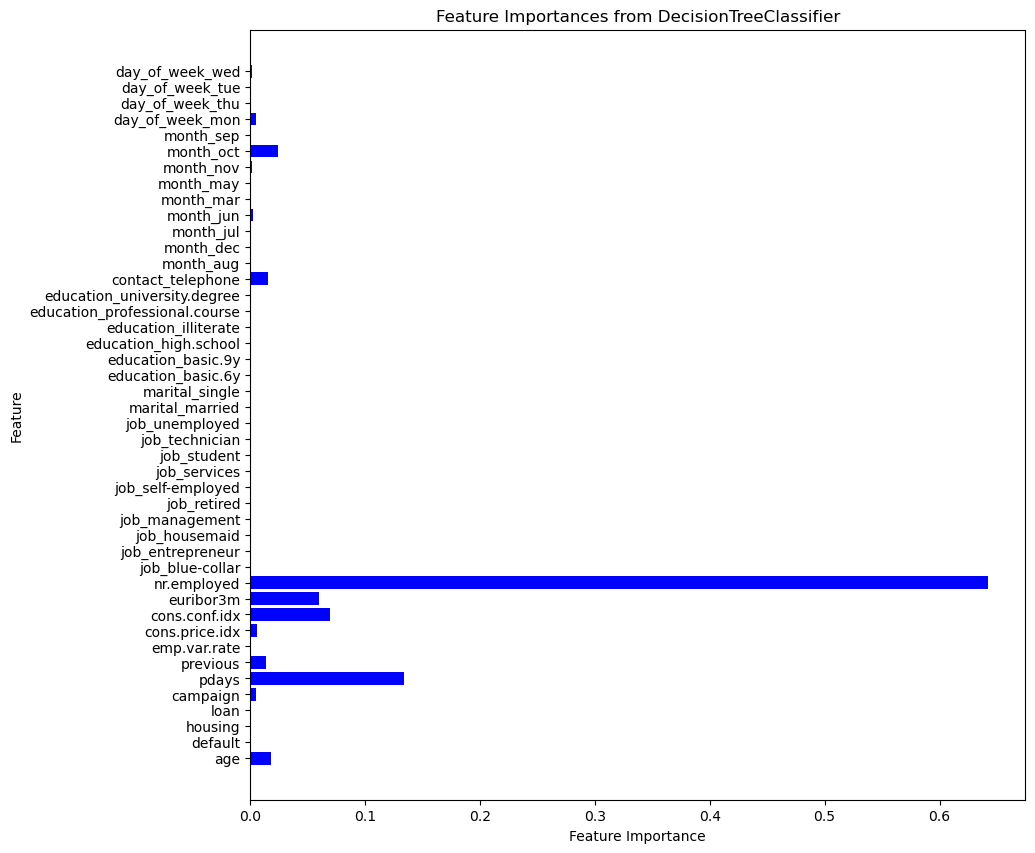

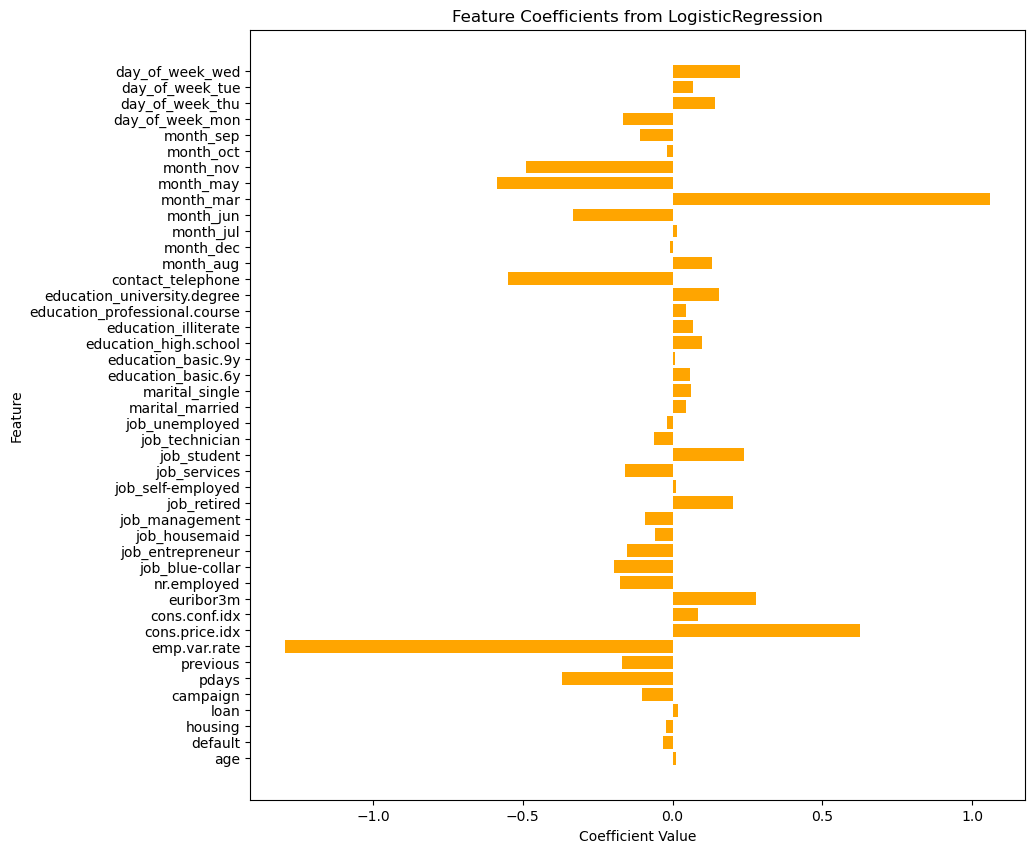

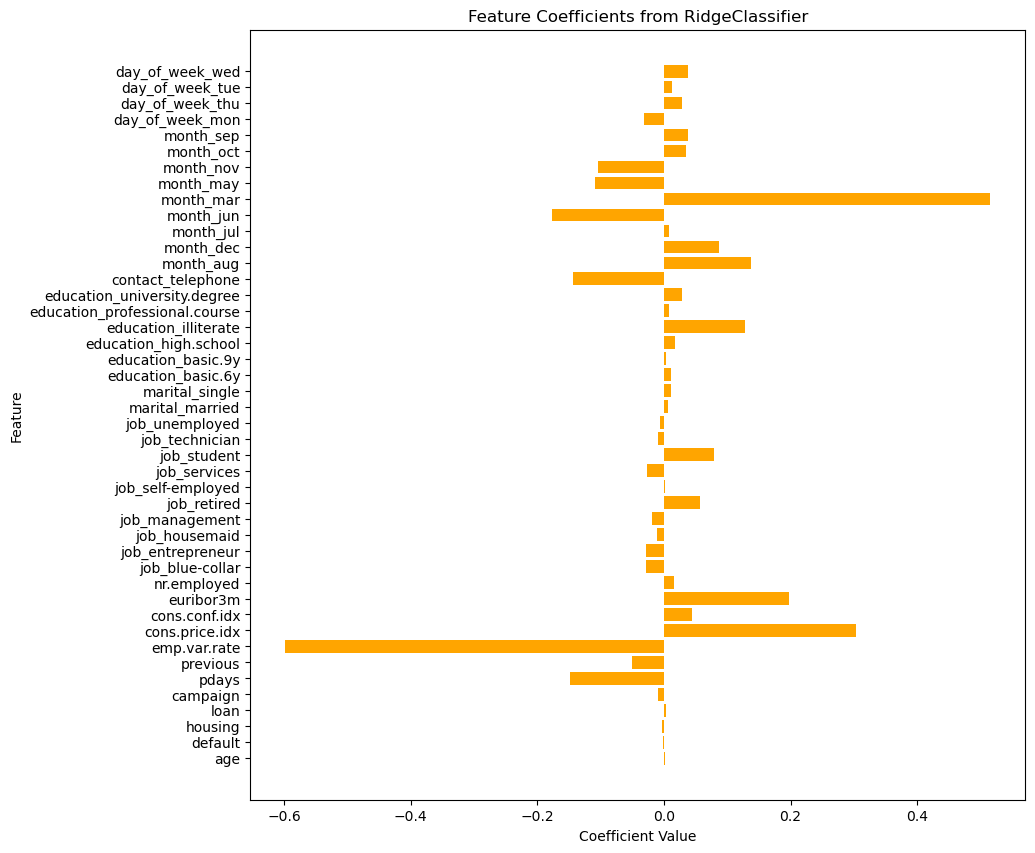

In [32]:
#Plot the Important features from the decission tree

# Get actual feature names from the DataFrame
feature_names = np.array(all_feature_names)[:len(feature_importances)]

# Plot the feature importances with actual feature names
plt.figure(figsize=(10, 10))
plt.barh(feature_names, feature_importances, color="blue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from DecisionTreeClassifier")
plt.show()

#Plot Logistic Regression Coefficients
feature_names = np.array(all_feature_names)[:len(logisticregression_coef)]
plt.figure(figsize=(10, 10))
plt.barh(feature_names, logisticregression_coef, color="orange")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title(f"Feature Coefficients from LogisticRegression")
plt.show()

#Plot RidgeClassifier Coefficients
feature_names = np.array(all_feature_names)[:len(ridgeclassifier_coef)]
plt.figure(figsize=(10, 10))
plt.barh(feature_names, ridgeclassifier_coef, color="orange")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title(f"Feature Coefficients from RidgeClassifier")
plt.show()



### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [33]:
# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Parameter', 'Train time', 'Train Accuracy', 'Test Accuracy'])
#results_df.set_index('Model', inplace=True)

# Save to JSON 
results_df.to_json('data/model_results.json')

results_df

,Model,Parameter,Train time,Train Accuracy,Test Accuracy
0,knn,{'knn__n_neighbors': 7},2.131378,0.900451,0.876025
1,logisticregression,{'logisticregression__C': 0.1},1.147257,0.889340,0.884388
2,decisiontreeclassifier,{'decisiontreeclassifier__max_depth': 5},0.342534,0.892825,0.887176
3,ridgeclassifier,{'ridgeclassifier__alpha': 10},0.325554,0.889094,0.884880
4,lasso,{'lasso__alpha': 1},0.293715,0.000000,-0.000182


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Remove all socio-economic features
- The hypothesis is the general population may not necessarily in sync with the national economy and may not influence personal decission

In [34]:
#Create a copy of a the clean dataframe and remove all socio-economic related features
df2_clean = df_clean.copy()
df2_clean = df2_clean.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis =1)

In [35]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          30488 non-null  int64 
 1   job          30488 non-null  object
 2   marital      30488 non-null  object
 3   education    30488 non-null  object
 4   default      30488 non-null  int64 
 5   housing      30488 non-null  int64 
 6   loan         30488 non-null  int64 
 7   contact      30488 non-null  object
 8   month        30488 non-null  object
 9   day_of_week  30488 non-null  object
 10  campaign     30488 non-null  int64 
 11  pdays        30488 non-null  int64 
 12  previous     30488 non-null  int64 
 13  y            30488 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 3.5+ MB


In [36]:
# Define features (X) and target (y)
X = df2_clean.drop('y', axis=1)
y = df2_clean['y']

# Encode the target variable (already implemented)
#le = LabelEncoder()
#y = le.fit_transform(y)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data using the preprocessor 
X_train_transformed = preprocessor.fit_transform(X_train) 
X_test_transformed = preprocessor.transform(X_test) 

# Get feature names from the OneHotEncoder 
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns) 

# Combine numerical and encoded feature names 
all_feature_names = numerical_columns + encoded_feature_names.tolist() 

### Define dummy classifier
dummy_clf = DummyClassifier().fit(X_train_transformed, y_train)
baseline_score = dummy_clf.score(X_test_transformed, y_test)
baseline_accuracy = accuracy_score(dummy_clf.predict(X_test), y_test)

print(baseline_score)
print(baseline_accuracy)
#score method and accuracy_score return the same value


# Define the models and hyperparameters

models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    #'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf','poly','sigmoid']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]}),
    'ridgeclassifier': (RidgeClassifier(), {'ridgeclassifier__alpha': [1, 10]}),
    'lasso': (Lasso(max_iter=1000), {'lasso__alpha': [1, 10]})
}

results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    # Get the best estimator
    best_model = grid_search.best_estimator_
    best_param = grid_search.best_params_
    best_estimator = best_model.named_steps[name]
    
    print('Best Model Parameters for', name, ':', grid_search.best_params_)
    if name == 'decisiontreeclassifier':
        feature_importances = best_estimator.feature_importances_
    if name == 'ridgeclassifier':
        ridgeclassifier_coef = best_estimator.coef_.flatten()

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    final_estimator = best_model.named_steps[name]        
    # Append the results
    results.append([name, best_param, fit_time, train_score, test_score])
    
# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Parameter', 'Train time', 'Train Accuracy', 'Test Accuracy'])
#results_df.set_index('Model', inplace=True)

# Save to JSON 
results_df.to_json('data/model_results.json')

results_df

0.8697933748770088
0.8697933748770088
Best Model Parameters for knn : {'knn__n_neighbors': 7}
Best Model Parameters for logisticregression : {'logisticregression__C': 0.1}
Best Model Parameters for decisiontreeclassifier : {'decisiontreeclassifier__max_depth': 5}
Best Model Parameters for ridgeclassifier : {'ridgeclassifier__alpha': 1}
Best Model Parameters for lasso : {'lasso__alpha': 1}


,Model,Parameter,Train time,Train Accuracy,Test Accuracy
0,knn,{'knn__n_neighbors': 7},6.064105,0.893440,0.874877
1,logisticregression,{'logisticregression__C': 0.1},0.353403,0.886880,0.880125
2,decisiontreeclassifier,{'decisiontreeclassifier__max_depth': 5},0.426980,0.889709,0.877829
3,ridgeclassifier,{'ridgeclassifier__alpha': 1},0.369373,0.886880,0.879469
4,lasso,{'lasso__alpha': 1},0.273081,0.000000,-0.000182


##### Questions

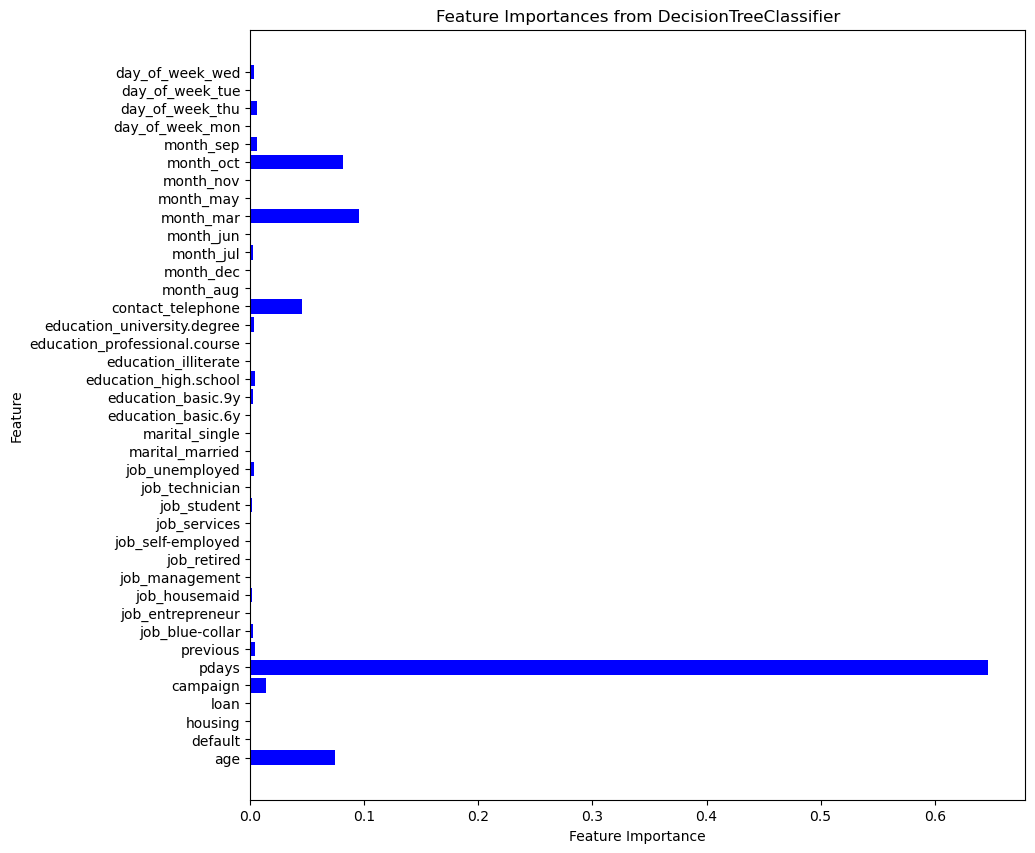

In [37]:
#Plot the Important features from the decission tree

# Get actual feature names from the DataFrame
feature_names = np.array(all_feature_names)[:len(feature_importances)]

# Plot the feature importances with actual feature names
plt.figure(figsize=(10, 10))
plt.barh(feature_names, feature_importances, color="blue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from DecisionTreeClassifier")
plt.show()

### Decission Tree Classifier; with different probability threshold

In [38]:
# Define features (X) and target (y)
# Define features (X) and target (y)
X = df_clean.drop('y', axis=1)
y = df_clean['y']

# Encode the target variable (already implemented)
#le = LabelEncoder()
#y = le.fit_transform(y)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data using the preprocessor 
X_train_transformed = preprocessor.fit_transform(X_train) 
X_test_transformed = preprocessor.transform(X_test) 

# Get feature names from the OneHotEncoder 
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns) 

# Combine numerical and encoded feature names 
all_feature_names = numerical_columns + encoded_feature_names.tolist() 

results = []
# Define the Decision Tree model and parameters 
decision_tree = DecisionTreeClassifier() 
params = {'decisiontreeclassifier__max_depth': [5, 10, 15]} 
# Create a pipeline 
pipeline = Pipeline([ ('preprocessor', preprocessor), ('decisiontreeclassifier', decision_tree) ])

    
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_
best_param = grid_search.best_params_
best_estimator = best_model.named_steps['decisiontreeclassifier']
    
print('Best Model Parameters for', 'decisiontreeclassifier', ':', grid_search.best_params_)
feature_importances = best_estimator.feature_importances_
# Evaluate on training and test sets
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)




# Append the results
results.append(['DecissionTreeClassifier', best_param, train_score, test_score])
    
# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Parameter', 'Train Accuracy', 'Test Accuracy'])
#results_df.set_index('Model', inplace=True)

# Save to JSON 
results_df.to_json('data/model_results.json')

results_df

Best Model Parameters for decisiontreeclassifier : {'decisiontreeclassifier__max_depth': 5}


,Model,Parameter,Train Accuracy,Test Accuracy
0,DecissionTreeClassifier,{'decisiontreeclassifier__max_depth': 5},0.892825,0.887176


In [39]:
# Function to evaluate test accuracy at different probability thresholds
def evaluate_thresholds(model, X, y, thresholds):
    # Get probabilities for the positive class (assuming binary classification)
    probabilities = model.predict_proba(X)[:, 1]
    scores = []
    for threshold in thresholds:
        predictions = (probabilities >= threshold).astype(int)
        score = accuracy_score(y, predictions)
        scores.append((threshold, score))
    return scores

# Define thresholds to evaluate
thresholds = np.linspace(0.1, 0.9, 9)  # Thresholds from 0.1 to 0.9

# Evaluate thresholds
threshold_results = evaluate_thresholds(best_estimator, X_test_transformed, y_test, thresholds)
# Print threshold results
for threshold, score in threshold_results:
    print(f"Threshold: {threshold:.2f}, Test Accuracy: {score:.4f}")



Threshold: 0.10, Test Accuracy: 0.7588
Threshold: 0.20, Test Accuracy: 0.8611
Threshold: 0.30, Test Accuracy: 0.8659
Threshold: 0.40, Test Accuracy: 0.8837
Threshold: 0.50, Test Accuracy: 0.8872
Threshold: 0.60, Test Accuracy: 0.8829
Threshold: 0.70, Test Accuracy: 0.8809
Threshold: 0.80, Test Accuracy: 0.8703
Threshold: 0.90, Test Accuracy: 0.8700


Text(0, 0.5, 'Test Accuracy')

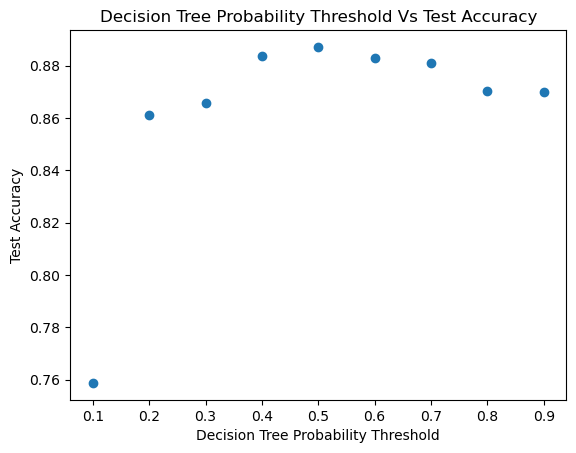

In [40]:
plt.scatter(thresholds, [t[1] for t in threshold_results])
plt.title('Decision Tree Probability Threshold Vs Test Accuracy')
plt.xlabel('Decision Tree Probability Threshold')
plt.ylabel('Test Accuracy')